<a href="https://colab.research.google.com/github/roquearmas/IABD_DATA/blob/main/Word2Vec_con_Gensim_Ram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Word2Vec con Gensim en Python
En el link [Word2Vec with Gensim - Python](https://www.youtube.com/watch?v=Z1VsHYcNXDI) se puede acceder al vídeo explicativo del uso del algoritmo Word2Vec con Gensim en Python.

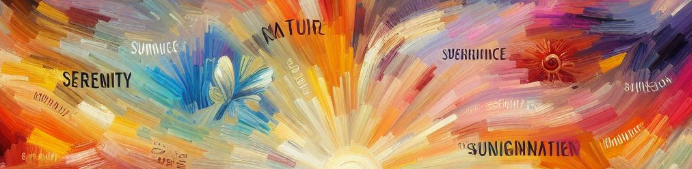

Implementar el código, añadir celdas markdown con los comentarios y explicaciones oportunas.

Importo las bibliotecas necesarias

In [3]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk

Creo un dataframe con el primer dataset de News de ***Reddit***

In [5]:
df = pd.read_csv('reddit_worldnews_start_to_2016-11-22.csv',error_bad_lines=False)

<ipython-input-5-b52e4655440d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('reddit_worldnews_start_to_2016-11-22.csv',error_bad_lines=False)


Muestra las 10 primeras filas del dataframe

In [6]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


Se descarga el paquete de datos punkt de nltk, punkt es un tokenizador de cadenas de caracteres que usaremos para dividir el texto en palabras y oraciones. Solamente hay que descargarlo una vez

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokeniza la columna title del dataset, guardando en newsvec una ista de listas de palabras que se utilizarán para entrenar el modelo Word2Vec. Cada lista interna puede contener una oración.

In [9]:
newsTitles = df['title'].values
newsVec = [nltk.word_tokenize(title) for title in newsTitles]
newsVec

[['Scores', 'killed', 'in', 'Pakistan', 'clashes'],
 ['Japan', 'resumes', 'refuelling', 'mission'],
 ['US', 'presses', 'Egypt', 'on', 'Gaza', 'border'],
 ['Jump-start', 'economy', ':', 'Give', 'health', 'care', 'to', 'all'],
 ['Council', 'of', 'Europe', 'bashes', 'EU', '&', 'UN', 'terror', 'blacklist'],
 ['Hay',
  'presto',
  '!',
  'Farmer',
  'unveils',
  'the',
  'illegal',
  'mock-Tudor',
  'castle',
  'he',
  'tried',
  'to',
  'hide',
  'behind',
  '40ft',
  'hay',
  'bales'],
 ['Strikes',
  ',',
  'Protests',
  'and',
  'Gridlock',
  'at',
  'the',
  'Poland-Ukraine',
  'Border'],
 ['The', 'U.N', '.', 'Mismanagement', 'Program'],
 ['Nicolas', 'Sarkozy', 'threatens', 'to', 'sue', 'Ryanair'],
 ['US',
  'plans',
  'for',
  'missile',
  'shields',
  'in',
  'Polish',
  'town',
  'met',
  'with',
  'resistance',
  '[',
  'video',
  ']'],
 ['Archbishop',
  'of',
  'Canterbury',
  'calls',
  'for',
  'new',
  'law',
  'to',
  'punish',
  'thoughtless',
  'or',
  'cruel',
  'words',
  '

 Genera un modelo Word2Vec a partir de los datos proporcionados en newsVec, considerando todas las palabras que aparecen al menos una vez en el corpus y generando vectores de palabras de 32 dimensiones.

In [10]:
model = Word2Vec(newsVec, min_count=1, vector_size=32)

Encontramos los vectores más similares a la palabra man. Por definición, responderá con las palabras más afines

In [ ]:
model.wv.most_similar('man')

[('woman', 0.9639550447463989),
 ('girl', 0.9013518691062927),
 ('couple', 0.8887461423873901),
 ('boy', 0.8870232701301575),
 ('teenager', 0.8862107992172241),
 ('mother', 0.8711955547332764),
 ('doctor', 0.8614891171455383),
 ('teacher', 0.8479596376419067),
 ('daughter', 0.8233441710472107),
 ('driver', 0.8224571943283081)]

Como prueba, también se pueden hacer operaciones matemáticas, entre vectores, generando analogías

In [ ]:
vec = model.wv['King'] - model.wv['man'] + model.wv['woman']
model.wv.most_similar([vec])

[('King', 0.9491186738014221),
 ('king', 0.819660484790802),
 ('Gandhi', 0.7973950505256653),
 ('Princess', 0.7833510637283325),
 ('Rushdie', 0.7776802778244019),
 ('Prince', 0.775164783000946),
 ('Abdullah', 0.7562532424926758),
 ('Queen', 0.7548490166664124),
 ('Salman', 0.7510315775871277),
 ('dictator', 0.7405967116355896)]

In [11]:
model.wv['man']

array([ 0.67724484, -1.582204  ,  1.0458975 ,  1.0799701 ,  0.1380612 ,
       -1.3106726 ,  0.8036574 ,  0.34338677, -1.16699   , -0.04395352,
        0.49136445, -0.78806734,  0.11066277, -0.8642155 , -0.7486384 ,
       -0.2693296 , -0.11459541,  0.78257424,  0.4331669 ,  1.5517992 ,
        0.95593405,  1.6354817 ,  1.923744  , -0.8132109 ,  0.3818185 ,
        0.76091415, -1.4413972 ,  0.8207335 , -0.29261294, -0.5396696 ,
       -0.7482719 ,  0.15608731], dtype=float32)

Importo el modelo preentrenado con 100000 palabras

In [12]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'


Mounted at /content/drive


In [13]:
model = KeyedVectors.load_word2vec_format(file_path, binary=True, limit=100000)

In [ ]:
model['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

Otras pruebas aritméticas...
Se podría traducir como ¿Cuál es equivalente a la palabra rey, pero, en vez de un hombre, para una mujer?

In [15]:
vec = model['King'] - model['man'] + model['woman']
model.most_similar([vec])

[('King', 0.7780153751373291),
 ('Queen', 0.55495285987854),
 ('Princess', 0.464548259973526),
 ('queen', 0.4479384422302246),
 ('Queen_Elizabeth', 0.4418003261089325),
 ('monarch', 0.43155860900878906),
 ('Empress', 0.42811447381973267),
 ('princess', 0.42595720291137695),
 ('Greene', 0.39877602458000183),
 ('Spalding', 0.39462387561798096)]

Si a un país le quitas su capital, y le sumas la capital de otro país, te debería dar el nombre de ese otro país, o la palabra más relacionada con él

In [16]:
vec = model['Germany'] - model['Berlin'] + model['Madrid']
model.most_similar([vec])

[('Spain', 0.7713854908943176),
 ('Madrid', 0.754533588886261),
 ('Barcelona', 0.6232754588127136),
 ('Real_Madrid', 0.6106423735618591),
 ('Spaniards', 0.6037396192550659),
 ('Sevilla', 0.5966300368309021),
 ('Atletico_Madrid', 0.5764991641044617),
 ('Barça', 0.568962037563324),
 ('Portugal', 0.568053662776947),
 ('FC_Barcelona', 0.5507020950317383)]

In [17]:
vec = model['Messi'] - model['football'] + model['tennis']
model.most_similar([vec])

[('Messi', 0.7960925102233887),
 ('Lionel_Messi', 0.7120644450187683),
 ('Nadal', 0.6976751685142517),
 ('Del_Potro', 0.6955868005752563),
 ('Xavi', 0.6640554666519165),
 ('Federer', 0.6603957414627075),
 ('Ronaldinho', 0.6550597548484802),
 ('Safin', 0.6450798511505127),
 ('Iniesta', 0.642850935459137),
 ('Wawrinka', 0.638897180557251)]

No funciona con otros deportes

In [ ]:
vec = model['Messi'] - model['football'] + model['basketball']
model.most_similar([vec])

[('Messi', 0.8537384867668152),
 ('Lionel_Messi', 0.7494894862174988),
 ('Xavi', 0.713768720626831),
 ('Ronaldinho', 0.712267279624939),
 ('Iniesta', 0.6907135844230652),
 ('Higuain', 0.6835602521896362),
 ("Eto'o", 0.6800540685653687),
 ('Ronaldo', 0.6777878999710083),
 ('Luis_Fabiano', 0.6772879362106323),
 ('Ibrahimovic', 0.6615908145904541)]